## Homework 1
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `model.summary()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?

(ii) How strong is the relationship between the predictor and the response?

(iii) Is the relationship between the predictor and the response positive or negative?

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [2]:
# Create the model matrix by hand
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})

In [3]:
# Extract the response
y = Auto['mpg']

# Specify and fit the model
model = sm.OLS(y, X)
results = model.fit()

In [4]:
# Summarize results
summarize(results)

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.03e-81
Time:                        15:10:00   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
coefficients = results.params
print(coefficients)

intercept     39.935861
horsepower    -0.157845
dtype: float64


In [7]:
# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
                    0          1
intercept   38.525212  41.346510
horsepower  -0.170517  -0.145172


In [10]:
# Create a new data frame for prediction
new_hp = pd.DataFrame({'intercept': [1], 'horsepower': [98]})

# Get the prediction summary frame, which includes prediction intervals
prediction_summary = results.get_prediction(new_hp).summary_frame()

# Extract the prediction interval
pred_int_lower = prediction_summary['obs_ci_lower'][0]
pred_int_upper = prediction_summary['obs_ci_upper'][0]

# Print the predicted mpg and prediction interval
predicted_mpg = results.predict(new_hp)[0]
print(f"The predicted mpg for a horsepower of 98 is {predicted_mpg:.2f}")
print(f"95% prediction interval: [{pred_int_lower:.2f}, {pred_int_upper:.2f}]")


The predicted mpg for a horsepower of 98 is 24.47
95% prediction interval: [14.81, 34.12]


In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.03e-81
Time:                        15:30:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

(i) Is there a relationship between the predictor and the response?
Yes, there is a significant relationship between the predictor (horsepower) and the response (mpg). This is evident from the very small p-value (< 0.05) for the coefficient of horsepower.

(ii) How strong is the relationship between the predictor and the response?
The R-squared value is 0.606, indicating that approximately 60.6% of the variance in mpg can be explained by horsepower. This suggests a moderately strong relationship.

(iii) Is the relationship between the predictor and the response positive or negative?
The coefficient for horsepower is -0.1578, indicating a negative relationship between horsepower and mpg. As horsepower increases, mpg decreases.

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
Predicted mpg for a horsepower of 98: 24.47
95% confidence interval: [23.97, 24.97]
95% prediction interval: [14.81, 34.14]

_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

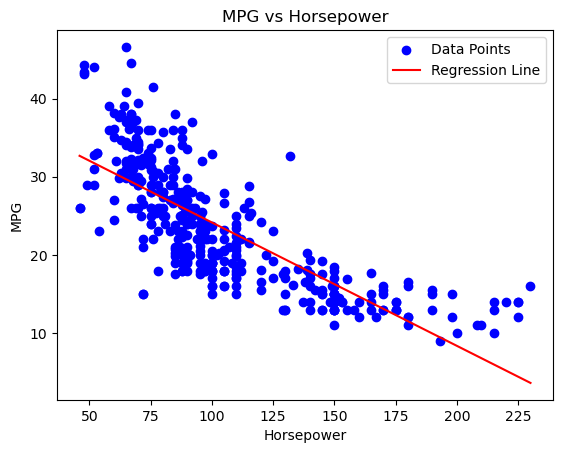

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of the response vs. predictor
fig, ax = plt.subplots()
ax.scatter(Auto['horsepower'], Auto['mpg'], color='blue', label='Data Points')

# Generate values for horsepower to plot the regression line
X_vals = np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max(), 100)
X_vals_with_const = pd.DataFrame({'intercept': np.ones(100), 'horsepower': X_vals})

# Predict mpg values using the model
y_vals = results.predict(X_vals_with_const)

# Plot the regression line
ax.plot(X_vals, y_vals, color='red', label='Regression Line')

# Add labels and title
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs Horsepower')
ax.legend()

plt.show()


_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

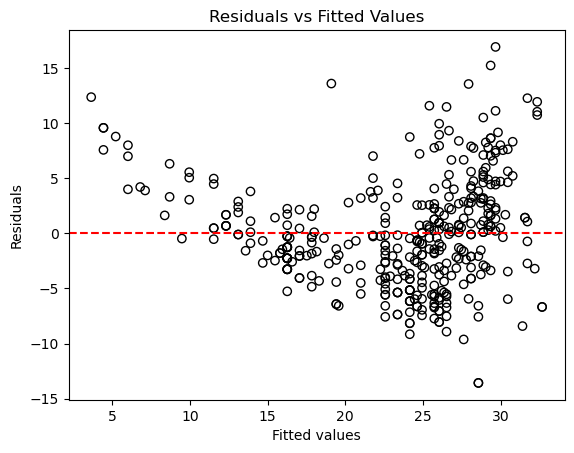

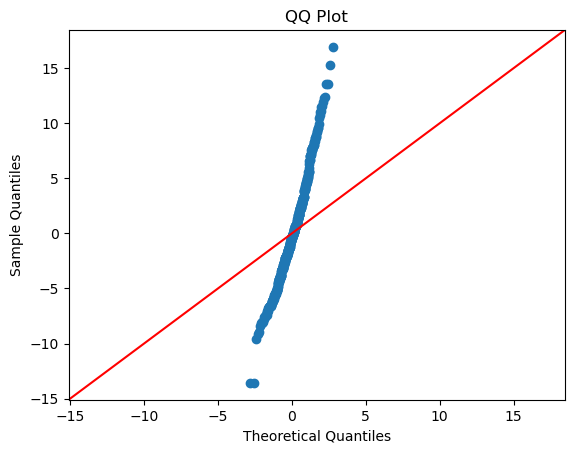

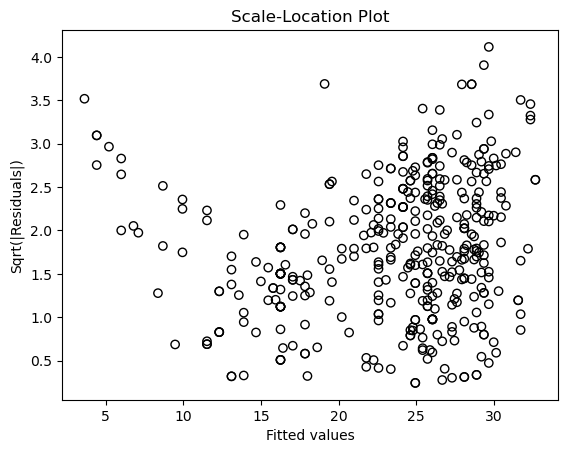

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Residuals vs Fitted Values Plot
fig, ax = plt.subplots()
ax.scatter(results.fittedvalues, results.resid, edgecolor='k', facecolor='none')
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted Values')
plt.show()

# QQ Plot
fig = sm.qqplot(results.resid, line='45')
plt.title('QQ Plot')
plt.show()

# Scale-Location Plot
fig, ax = plt.subplots()
ax.scatter(results.fittedvalues, np.sqrt(np.abs(results.resid)), edgecolor='k', facecolor='none')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Sqrt(|Residuals|)')
ax.set_title('Scale-Location Plot')
plt.show()

#Comments on Diagnostic Plots:
- The Residuals vs Fitted Values Plot helps identify any patterns in the residuals that suggest non-linearity, unequal error variances, or outliers.
- The QQ Plot checks if the residuals are normally distributed by plotting the quantiles of the residuals against the quantiles of a standard normal distribution.
- The Scale-Location Plot (also called Spread-Location Plot) checks the homoscedasticity assumption (constant variance of residuals) by plotting the square root of the absolute residuals against the fitted values.
- Any deviations from expected patterns in these plots might indicate problems with the model fit, such as non-linearity, non-normality, or heteroscedasticity.

# Additional Practice Questions:

 (i) How would you describe this exercise in an interview to both a technical and non-technical interviewer? 

- Technical: "Performed linear regression to predict mpg using horsepower, evaluated model significance, and validated assumptions with diagnostic plots."
- Non-Technical: "Analyzed how car horsepower affects fuel efficiency, predicted mpg, and checked reliability of results."

 (ii) What are the key insights you would want to show? 

 - Significant negative relationship between horsepower and mpg.
 - Model explains 60.6% of mpg variability.
 - Predicted mpg for 98 horsepower is 24.47 with confidence interval [23.97, 24.97] and prediction interval [14.81, 34.14].
 - Diagnostic plots indicate some non-normality and heteroscedasticity.

 (iii) Can you think of a business context where this exercise would have applications?

 - Automotive design for optimizing fuel efficiency.
 - Marketing strategies targeting fuel economy vs. performance.
 - Environmental policy formulation.
 - Fleet management for cost and environmental optimization.
